In [2]:
import matplotlib.pyplot as plt
import seaborn
from matplotlib import rc
import pandas as pd
import numpy as np 
seaborn.set_style('ticks')
%matplotlib inline
import os
from os import listdir, walk
from os.path import isfile, join, isdir
import pickle
import re
import sys
sys.path.append("./")
from datetime import datetime
from datetime import timedelta
import os.path
import time as t
import pprint
from matplotlib.pyplot import *
import h5py
%matplotlib inline
 
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf')

# Exploring the properties of earthquake data
outputs file is basically a list consisting the header of all the files.

In [4]:
df = pd.read_csv('metadata_earthquake.csv')  # earthquake data
df.head()

/Users/mostafamousavi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.5,17.08,...,NaN,NaN,0.92,102.09,159.3,"[56.79999923706055, 55.400001525878906, 47.400...",2896.0,2006-07-23 15:59:00.960000,earthquake_local,109C.TA_20060723155859_EV
1,TA,109C,BH,32.8889,-117.1051,150.0,600.0,manual,0.5,16.88,...,NaN,NaN,0.91,101.34,281.7,"[65.0, 65.5, 61.400001525878906]",5508.0,2006-11-03 15:56:53.610000,earthquake_local,109C.TA_20061103155652_EV
2,TA,109C,BH,32.8889,-117.1051,150.0,500.0,manual,0.5,17.26,...,NaN,NaN,0.92,101.87,280.5,"[37.20000076293945, 42.0, 38.599998474121094]",3114.0,2006-11-03 16:12:24.700000,earthquake_local,109C.TA_20061103161223_EV
3,TA,109C,BH,32.8889,-117.1051,150.0,900.0,manual,0.5,17.28,...,NaN,NaN,0.93,103.26,281.6,"[54.099998474121094, 54.900001525878906, 45.5]",3152.0,2006-11-14 13:32:22.540000,earthquake_local,109C.TA_20061114133221_EV
4,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.5,18.14,...,NaN,NaN,0.92,102.48,4.7,"[58.20000076293945, 56.20000076293945, 53.7999...",3134.0,2006-11-27 10:46:41.060000,earthquake_local,109C.TA_20061127104640_EV


In [195]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058954 entries, 0 to 1058953
Data columns (total 35 columns):
network_code                        1058899 non-null object
receiver_code                       1058954 non-null object
receiver_type                       1058954 non-null object
receiver_latitude                   1058954 non-null float64
receiver_longitude                  1058954 non-null float64
receiver_elevation_m                1058954 non-null float64
p_arrival_sample                    1058954 non-null float64
p_status                            1058954 non-null object
p_weight                            1058779 non-null float64
p_travel_sec                        1058728 non-null float64
s_arrival_sample                    1058954 non-null float64
s_status                            1058954 non-null object
s_weight                            1058799 non-null float64
source_id                           1058954 non-null object
source_origin_time                  105

,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_weight,p_travel_sec,s_arrival_sample,s_weight,source_origin_uncertainty_sec,source_latitude,...,source_error_sec,source_gap_deg,source_horizontal_uncertainty_km,source_depth_km,source_depth_uncertainty_km,source_magnitude,source_distance_deg,source_distance_km,back_azimuth_deg,coda_end_sample
count,1.058954e+06,1.058954e+06,1.058954e+06,1.058954e+06,1.058779e+06,1.058728e+06,1.058954e+06,1.058799e+06,157828.000000,1.058954e+06,...,480648.000000,399717.000000,459085.000000,1.058903e+06,375619.000000,1.058954e+06,1.058954e+06,1.058954e+06,1.058954e+06,1.058954e+06
mean,4.043201e+01,-1.154209e+02,1.044695e+03,6.614785e+02,7.083343e-01,2.383382e+01,1.359365e+03,6.481444e-01,0.956973,4.040894e+01,...,0.440956,106.593607,1.464560,1.582491e+01,1.381620,1.563097e+00,4.773989e-01,5.308283e+01,1.880084e+02,2.567419e+03
std,1.403364e+01,4.430656e+01,6.512366e+02,1.761460e+02,2.094799e-01,6.094377e+03,6.365573e+02,2.421301e-01,3.784341,1.400124e+01,...,0.457358,68.700418,2.128257,2.446798e+01,2.071373,1.004975e+00,4.656426e-01,5.173644e+01,1.025415e+02,1.197545e+03
min,-4.241598e+01,-1.788566e+02,-2.920500e+03,8.700000e+00,0.000000e+00,0.000000e+00,5.170000e+01,0.000000e+00,0.000000,-4.384550e+01,...,0.000000,5.282000,0.000000,-3.490000e+00,0.000000,-5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.890000e+02
25%,3.361170e+01,-1.241713e+02,5.410000e+02,5.000000e+02,5.900000e-01,3.630000e+00,9.310000e+02,5.500000e-01,0.620000,3.378700e+01,...,0.110200,54.000000,0.000000,4.180000e+00,0.390000,8.000000e-01,1.545000e-01,1.719000e+01,1.066300e+02,1.704000e+03
50%,3.761310e+01,-1.185740e+02,1.042600e+03,6.990000e+02,6.700000e-01,7.450000e+00,1.219000e+03,6.200000e-01,0.870000,3.759637e+01,...,0.220000,91.000000,0.380000,8.510000e+00,0.630000,1.340000e+00,3.605000e-01,4.013000e+01,1.814000e+02,2.305000e+03
75%,4.611120e+01,-1.165960e+02,1.392000e+03,8.000000e+02,9.200000e-01,1.285000e+01,1.638668e+03,8.500000e-01,1.130000,4.592767e+01,...,0.662500,141.317000,2.326180,1.432000e+01,1.300000,2.100000e+00,6.545000e-01,7.281000e+01,2.839900e+02,3.171000e+03
max,7.891540e+01,1.793000e+02,4.153000e+03,2.939000e+03,1.000000e+00,2.560060e+06,5.656000e+03,1.000000e+00,999.000000,7.838040e+01,...,29.330000,360.000000,10.000000,3.417400e+02,15.000000,7.900000e+00,3.000000e+00,3.462700e+02,3.600000e+02,6.000000e+03


# Exploring the properties of noise data

In [198]:
dfn = pd.read_csv('metadata_noise.csv')  # noise data
dfn.head()

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,trace_category,trace_name
0,TA,109C,HH,32.8889,-117.1051,150.0,noise,109C.TA_201510210555_NO
1,TA,109C,HH,32.8889,-117.1051,150.0,noise,109C.TA_201511061450_NO
2,TA,109C,HH,32.8889,-117.1051,150.0,noise,109C.TA_201511070220_NO
3,TA,109C,HH,32.8889,-117.1051,150.0,noise,109C.TA_201511140515_NO
4,TA,109C,HH,32.8889,-117.1051,150.0,noise,109C.TA_201512251850_NO


In [199]:
dfn.info()
dfn.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105937 entries, 0 to 105936
Data columns (total 8 columns):
network_code            105937 non-null object
receiver_code           105937 non-null object
receiver_type           105937 non-null object
receiver_latitude       105937 non-null float64
receiver_longitude      105937 non-null float64
receiver_elevation_m    105937 non-null float64
trace_category          105937 non-null object
trace_name              105937 non-null object
dtypes: float64(3), object(5)
memory usage: 6.5+ MB


,receiver_latitude,receiver_longitude,receiver_elevation_m
count,105937.000000,105937.000000,105937.000000
mean,37.882381,-116.603608,726.995546
std,10.675363,32.086295,749.095427
min,-37.809300,-176.684200,-412.000000
25%,37.154320,-122.484700,190.000000
50%,37.877530,-121.800370,437.000000
75%,40.284130,-120.249860,967.000000
max,71.322100,145.711500,3980.000000


# Overal

In [206]:
uniq_stn = df.receiver_code.unique()
print('number of stations: ', len(uniq_stn))

uniq_net = df.network_code.unique()
print('number of networks: ', len(uniq_net))

uniq_eq = df.source_id.unique()
print('number of earthquakes ', len(uniq_eq))

uniq_ins = df.receiver_type.unique()
print('number of unique instrument_type: ', len(uniq_ins))

total_seis = sum(n == 'earthquake_local' for n in df.trace_category)
print('number of earthquake seismograms: ', total_seis)
print('number of noise seismograms: ', sum(n == 'noise' for n in dfn.trace_category))

number of stations:  2613
number of networks:  142
number of earthquakes  448635
number of unique instrument_type:  8
number of earthquake seismograms:  1058954
number of noise seismograms:  105937


# Distance Vs Magnitude

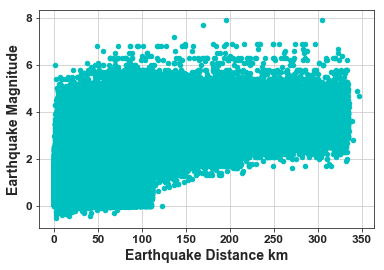

In [202]:
df.plot(kind='scatter', x = 'source_distance_km',y='source_magnitude', color= 'c')
rc('font', weight='bold')
plt.ylabel("Earthquake Magnitude",fontweight='bold',fontsize=14)
plt.xlabel('Earthquake Distance km',fontweight='bold',fontsize=14)
plt.rcParams.update({'font.size': 12})
plt.tick_params()
plt.grid(True)
plt.savefig('2.png', dpi=500)
plt.show()

# Depth Vs Magnitude

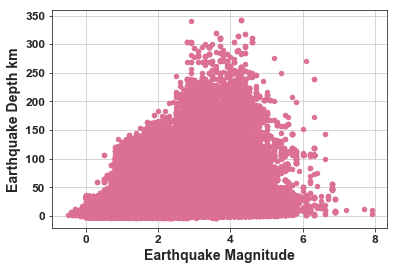

In [232]:
df.plot(kind='scatter',x='source_magnitude', y = 'source_depth_km', color = 'palevioletred')
rc('font', weight='bold')
plt.ylabel("Earthquake Depth km",fontweight='bold',fontsize=14)
plt.xlabel('Earthquake Magnitude',fontweight='bold',fontsize=14)
plt.rcParams.update({'font.size': 12})
plt.tick_params()
plt.grid(True)
plt.savefig('1.png', dpi=500)
plt.show()

# Distance Vs Depth

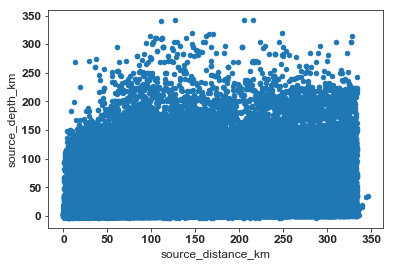

In [203]:
df.plot(kind='scatter', x = 'source_distance_km', y = 'source_depth_km')
plt.show()

# Distribution of the earthquake magnitudes

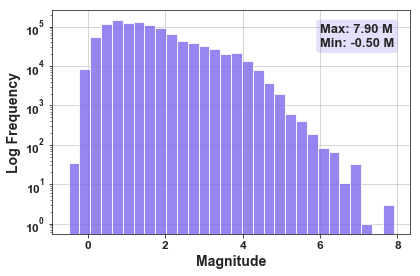

In [207]:
df['source_magnitude'].plot(kind='hist', bins = 30, logy=True, facecolor='mediumslateblue', alpha=0.80)

textstr = '\n'.join((
    r'Max: %.2f M' % (df['source_magnitude'].max(), ),
    r'Min: %.2f M' % (df['source_magnitude'].min(), )))

props = dict(boxstyle='round', facecolor='mediumslateblue', alpha=0.2)

plt.text(6, 120000, textstr, fontsize=13, verticalalignment='top', bbox=props)
rc('font', weight='bold')
plt.ylabel("Log Frequency",fontweight='bold',fontsize=14)
plt.xlabel('Magnitude',fontweight='bold',fontsize=14)
plt.rcParams.update({'font.size': 12})
plt.tick_params()
plt.grid(True)
plt.tight_layout()
plt.savefig('3.png', dpi=500)
plt.show()
# sum(n > 7.9 for n in df.earthquake_magnitude)

# Distribution of the earthquake depths

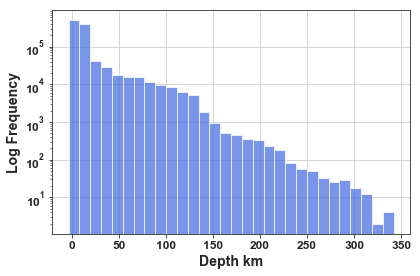

In [208]:
df['source_depth_km'].astype('float64').plot(kind='hist', bins = 30, logy=True,facecolor='royalblue', alpha=0.70)
textstr = '\n'.join((
    r'Max: %.1f km' % (df['source_depth_km'].max(), ),
    r'Min: %.1f km' % (df['source_depth_km'].min(), )))

props = dict(boxstyle='round', facecolor='royalblue', alpha=0.15)

rc('font', weight='bold')
plt.ylabel("Log Frequency",fontweight='bold',fontsize=14)
plt.xlabel('Depth km',fontweight='bold',fontsize=14)
plt.rcParams.update({'font.size': 12})
plt.grid(True)
plt.tight_layout()
plt.savefig('4.png', dpi=500)
plt.show()

# Distribution of the earthquake-station distances

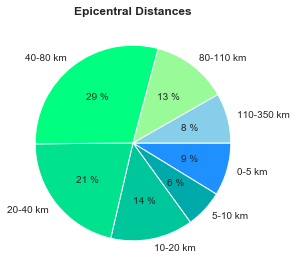

In [5]:
values = [
sum(n < 5 and n >= 0 for n in df.source_distance_km)/sum(n > 0 for n in df.source_distance_km),
sum(n < 10 and n >= 5 for n in df.source_distance_km)/sum(n > 0 for n in df.source_distance_km),
sum(n < 20 and n >= 10 for n in df.source_distance_km)/sum(n > 0 for n in df.source_distance_km),
sum(n < 40 and n >= 20 for n in df.source_distance_km)/sum(n > 0 for n in df.source_distance_km),
sum(n < 80 and n >= 40 for n in df.source_distance_km)/sum(n > 0 for n in df.source_distance_km),
sum(n < 110 and n >= 80 for n in df.source_distance_km)/sum(n > 0 for n in df.source_distance_km),
sum(n < 350 and n >= 110 for n in df.source_distance_km)/sum(n > 0 for n in df.source_distance_km)];

labels = ['0-5 km', '5-10 km', '10-20 km', '20-40 km', '40-80 km', '80-110 km', '110-350 km']
colors = ['dodgerblue', '#00AAAA','#00C69C', '#00E28E', '#00FF80', 'palegreen','skyblue']
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.0f %%',
counterclock=False, shadow=False)
plt.title('Epicentral Distances', weight='bold')
rc('font', weight='bold')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig('5.png', dpi=500)
plt.show()

# Distribution of the average SNR

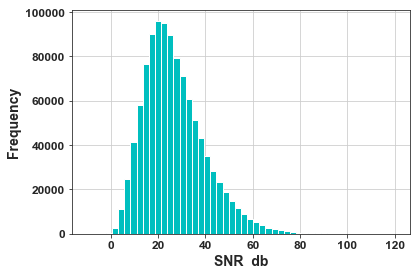

In [210]:
snr = []
from ast import literal_eval
for i2 in df['snr_db']:
    L = literal_eval(i2.replace(' ', ',').replace(',,', ',').replace(',,', ',').replace('.,,', '.0,').replace('[,', '[').replace('.,]', '.0]').replace('nan', '0.0'))
    msnr = np.round(np.mean(L), 2)
    snr.append(msnr)

plt.hist(snr,  bins=50, facecolor='c')
plt.ylabel("Frequency",fontweight='bold',fontsize=14)
plt.xlabel('SNR  db',fontweight='bold',fontsize=14)
rc('font', weight='bold')
plt.rcParams.update({'font.size': 12})
plt.grid(True)
plt.tight_layout()
plt.savefig('6.png', dpi=500)
plt.show()   

# Receiver Types

['BH' 'HH' 'SH' 'EH' 'HL' 'LH' 'EL' 'BL']


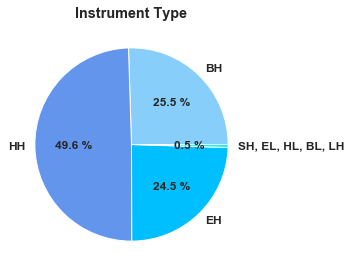

In [211]:
uniq_ins = df.receiver_type.unique()
print(uniq_ins)
#df.file_name[df.instrument_type== 'HG']

values = [
sum(n == 'BH' for n in df.receiver_type)/total_seis,
sum(n == 'HH' for n in df.receiver_type)/total_seis,
sum(n == 'EH' for n in df.receiver_type)/total_seis,
(sum(n == 'SH' for n in df.receiver_type)+sum(n == 'HL' for n in df.receiver_type)+sum(n == 'LH' for n in df.receiver_type)+
 sum(n == 'EL' for n in df.receiver_type)+sum(n == 'BL' for n in df.receiver_type))/total_seis];

labels =  ['BH', 'HH', 'EH', 'SH, EL, HL, BL, LH']
# colors = ['peachpuff', 'palevioletred', 'lightpink','red']
colors = ['lightskyblue', 'cornflowerblue', 'deepskyblue','aqua']
explode = (0.0, 0.0, 0.0, 0.0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f %%',
counterclock=True, shadow=False)
plt.title('Instrument Type', weight='bold')
rc('font', weight='bold')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig('7.png', dpi=500)
plt.show()

#'HH' => High Broad Band/High Gain
#'HN'High Broad Band/Accelerometer
#'HL'High Broad Band/ Low Gain Seismometer
#'BL'Broad Band/ Low Gain Seismometer
#'BH'Broad Band/ High Gain
#'EL'Extremely Short Period/Low Gain Seismometer
#'EH'Extremely Short Period/High Gain
#'SH'Short Period/High Gain

In [227]:
# number of BH stations
df['receiver_type'].str.contains('BH').sum()

269984

# Distribution of data as a function of time

In [37]:
#labels = [];
#values = [];
#for i in range(1984,2019, 1):
#    labels.append(i)
#    values.append(sum(n == str(i) for n in df['earthquake_origin_time'].str.split("-", n = 1, expand = True)[0]))    

In [212]:
vc = pd.to_datetime(df['source_origin_time']).dt.year.value_counts()
labels = [];
values = [];
for i in range(1984,2019, 1):
    labels.append(i)
    try:
        values.append(vc.to_dict()[i])
    except Exception:
        values.append(0)  

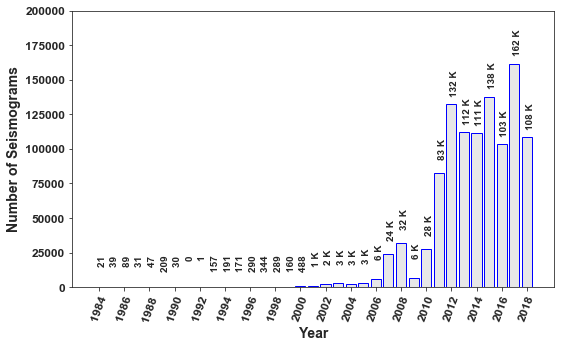

In [213]:
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.0f %s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

fig = plt.figure(figsize=(8, 5))
plt.bar(labels, values, align='center', color=(0.1, 0.1, 0.1, 0.1), edgecolor='blue')
plt.xticks(np.arange(min(labels), max(labels)+1, 2.0))
plt.ylabel("Number of Seismograms",fontweight='bold',fontsize=14)
plt.xlabel('Year',fontweight='bold',fontsize=14)
plt.xticks(rotation=70,size = 12)
for i in range(len(values)):
    plt.text(x = labels[i]-0.1 , y = values[i]+20000, s = human_format(values[i]), size = 10,  rotation=90)
plt.ylim((0, 200000))
rc('font', weight='bold')
plt.tight_layout()
plt.savefig('8.png', dpi=300)
plt.show()

# Back-Azimuths

In [26]:
frq = []; rad = [];
for d in np.arange(0, 359, 1):
    rad.append(d)
    frq.append(sum(n >= d and n < (d+1) for n in df.back_azimuth_deg))

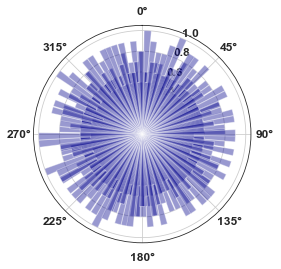

In [27]:
newfreq = [np.round(x/np.max(frq), 1) for x in frq]

ax = plt.subplot(111, projection='polar')
bars = ax.bar(rad, newfreq, width=0.07, bottom=0.0)
ax.set_theta_direction('clockwise')
ax.set_theta_zero_location('N')
#plt.title('Back Azimuth', weight='bold')
# Use custom colors and opacity
for r, bar in zip(rad, bars):
    bar.set_facecolor('darkblue')
    bar.set_alpha(0.4)
rc('font', weight='bold')
plt.savefig('9.png', dpi=500)
plt.show()

# Pick types

In [214]:
uniq_S = df.s_status.unique()
labS = []
valS = []
for ii in range(0, len(uniq_S)):
    labS.append(str(uniq_S[ii]))
    valS.append(100*np.round(sum(n == str(uniq_S[ii]) for n in df.s_status)/(2*total_seis), 2))

uniq_P = df.p_status.unique()
labP = []
valP = []
for ii in range(0, len(uniq_P)):
    labP.append(str(uniq_P[ii]))
    valP.append(100*np.round(sum(n == str(uniq_P[ii]) for n in df.p_status)/(2*total_seis), 2))
print(uniq_S)
print(uniq_P)

['manual' 'autopicker' 'automatic']
['manual' 'autopicker' 'automatic']


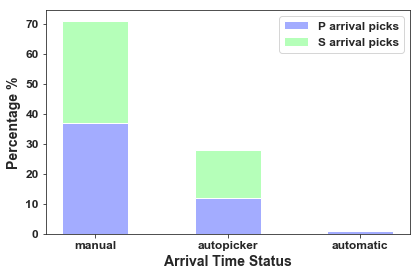

In [215]:
# Values of each group
bars1 = valP
bars2 = valS
bars = np.add(bars1, bars2).tolist()
r = [0,1,2]
names = labP
barWidth = 0.5
plt.bar(r, bars1, color='#a3acff', edgecolor='white', width=barWidth, label='P arrival picks')
plt.bar(r, bars2, bottom=bars1, color='#b5ffb9', edgecolor='white', width=barWidth, label='S arrival picks')
rc('font', weight='bold')
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Arrival Time Status",fontweight='bold',fontsize=14)
plt.ylabel("Percentage %",fontweight='bold',fontsize=14)
plt.legend()
plt.tight_layout()

plt.savefig('10.png', dpi=500)
plt.show()

# Magnitude types

In [216]:
nam = [str(n) for n in df.source_magnitude if str(n) == 'nan']
print('without mag ', len(nam))
nat = [str(n) for n in df.source_magnitude_type if str(n) == 'nan']
print('without mag type ', len(nat))
wm = [str(n) for n in df.source_magnitude_type if str(n) != 'nan']
print(len(wm), ' with mag out of ', total_seis)

without mag  0
without mag type  0
1058954  with mag out of  1058954


In [217]:
uniq_ins = df.source_magnitude_type.unique()
print(uniq_ins)

['ml' 'mb' 'mw' 'md' 'ms' 'mwr' 'mb_lg' 'mn' 'mpv' 'mlg' 'mwc' 'mc' 'mg'
 'mh' 'mlr' 'mww' 'mpva' 'mbr' 'mblg' 'mwb' 'mlv' 'h' 'm' 'none' 'mdl']


In [218]:
labM = []
valM = []
for ii in range(0, len(uniq_ins)):
    print(str(uniq_ins[ii]), sum(n == str(uniq_ins[ii]) for n in df.source_magnitude_type))
    labM.append(str(uniq_ins[ii]))
    valM.append(sum(n == str(uniq_ins[ii]) for n in df.source_magnitude_type))
sum(valM)

ml 739250
mb 51641
mw 8375
md 243261
ms 296
mwr 1966
mb_lg 5684
mn 559
mpv 4709
mlg 246
mwc 9
mc 15
mg 86
mh 1502
mlr 22
mww 140
mpva 359
mbr 29
mblg 71
mwb 3
mlv 230
h 274
m 133
none 18
mdl 76


1058954

[0.6983325054723812, 0.04879343200932241, 0.22991555818288614, 0.023084099970348097]
['ml', 'mb', 'md', 'etc']


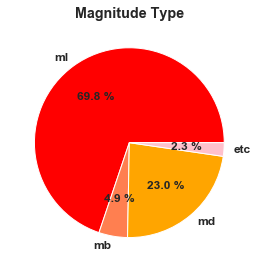

In [219]:
valM2 = [(valM[0]+valM[14]+valM[20])/total_seis, 
         (valM[1]+valM[17])/total_seis,
         (valM[3]+valM[24]+valM[22])/total_seis,
         (valM[2]+valM[5]+valM[10]+valM[15]+valM[19]+valM[22]+valM[4]+valM[8]+valM[11]+valM[12]+valM[13]+valM[16]+valM[21]+valM[23]+valM[6]+valM[9]+valM[18]+valM[7])/total_seis] 
labM2 = ['ml','mb', 'md','etc']
print(valM2)
print(labM2)
colors = ['r', 'coral', 'orange', 'pink']
plt.pie(valM2, colors=colors, labels=labM2,
autopct='%1.1f %%',
counterclock=True, shadow=False)
plt.title('Magnitude Type', weight='bold')
rc('font', weight='bold')
plt.rcParams.update({'font.size': 14})
plt.tight_layout()

plt.savefig('11.png', dpi=500)
plt.show()



In [220]:
uniq_ins = df.source_magnitude_author.unique()
print(uniq_ins)
labM = []
valM = []
for ii in range(len(uniq_ins)):
    print(str(uniq_ins[ii]), sum(n == str(uniq_ins[ii]) for n in df.source_magnitude_author))
    labM.append(str(uniq_ins[ii]))
    valM.append(np.round(sum(n == str(uniq_ins[ii]) for n in df.source_magnitude_author)/sum(n != None for n in df.source_magnitude_author.dropna()), 2))

print('total with mag author: ', sum(n != None for n in df.source_magnitude_author.dropna()))


[nan 'CI' 'UW' 'LD' 'NC' 'US' 'HV' 'NN' 'AK' 'ZAMG' 'NM' 'UU' 'TUL' 'SE'
 'ISMP' 'PGC' 'MB' 'SLM']
nan 0
CI 112685
UW 11514
LD 365
NC 68063
US 190
HV 2759
NN 49606
AK 32
ZAMG 1
NM 1074
UU 2003
TUL 50
SE 333
ISMP 3442
PGC 8
MB 187
SLM 1
total with mag author:  252313


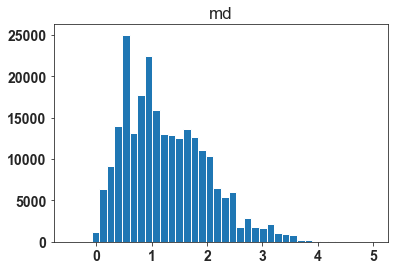

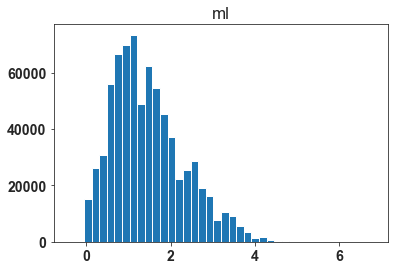

In [221]:
mg = df.source_magnitude[df.source_magnitude_type == 'md']
plt.hist(mg, bins = 40)
plt.title('md')
plt.show()
mg = df.source_magnitude[df.source_magnitude_type == 'ml']
plt.hist(mg, bins = 40)
plt.title('ml')
plt.show()

# Distributions of P and S arrival times

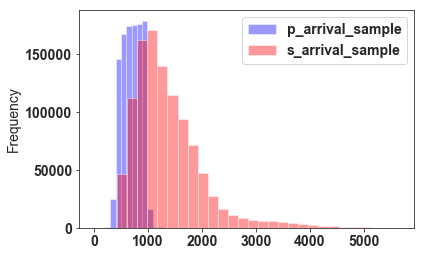

In [222]:
df['p_arrival_sample'].plot(kind='hist', bins = 30, facecolor='blue', alpha=0.40, legend= 'P arrivals')
df['s_arrival_sample'].plot(kind='hist', bins = 30, facecolor='red', alpha=0.40, legend= 'S arrivals')

In [223]:
df['p_arrival_sample'].min()

8.7

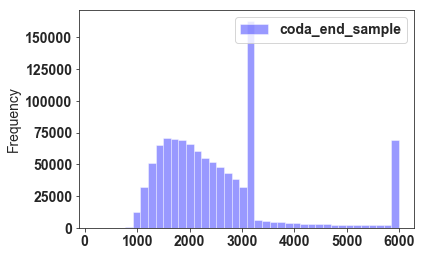

In [224]:
df['coda_end_sample'].plot(kind='hist', bins = 40, facecolor='blue', alpha=0.40, legend= 'coda_end_sample')

In [144]:
# list of waveforms with focal mechanism
dna = df.trace_name[[str(n) != 'nan' for n in df.source_mechanism_strike_dip_rake]] 
print(dna)

192        109C.TA_20130311165610_EV
193        109C.TA_20130311165615_EV
281        109C.TA_20140317132558_EV
457        735A.TA_20111020122441_EV
461        A04A.TA_20050309172829_EV
491        A04A.TA_20070813042058_EV
499        A04A.TA_20071101012712_EV
502        A04A.TA_20080108163254_EV
509        A04D.TA_20101210201927_EV
513        A04D.TA_20110205215906_EV
520        A04D.TA_20110615035031_EV
521        A04D.TA_20110619105514_EV
527        A04D.TA_20111102044958_EV
550        A04D.TA_20120718202413_EV
556        A04D.TA_20120821100029_EV
560        A04D.TA_20120905121648_EV
561        A04D.TA_20120907231010_EV
577        A04D.TA_20130101041544_EV
586        A04D.TA_20130222013553_EV
591        A04D.TA_20130311044007_EV
601        A04D.TA_20130621043925_EV
612        A04D.TA_20130713065032_EV
646        A04D.TA_20140710163226_EV
688        A04D.TA_20150618234658_EV
727        A05A.TA_20070606005216_EV
759        A05A.TA_20080108163258_EV
772        A05A.TA_20080225061034_EV
8

# S-weight

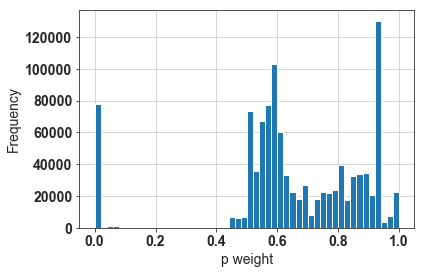

In [103]:
df['s_weight'].plot(kind='hist', bins= 50)
plt.xlabel('p weight')
plt.grid(True)
plt.show()

# P-weight

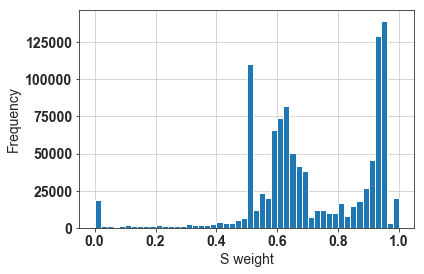

In [104]:
df['p_weight'].plot(kind='hist', bins= 50)
plt.xlabel('S weight')
plt.grid(True)
plt.show()

# Uncertainties

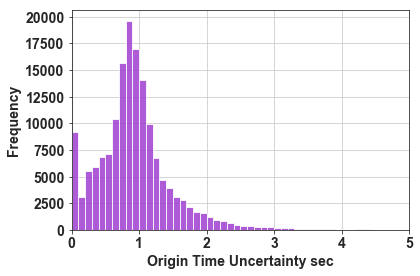

In [229]:
df['source_origin_uncertainty_sec'].plot(kind='hist', bins=10000, facecolor='darkorchid', alpha=0.80)
plt.xlim([0, 5])

plt.ylabel("Frequency",fontweight='bold',fontsize=14)
plt.xlabel('Origin Time Uncertainty sec',fontweight='bold',fontsize=14)
plt.rcParams.update({'font.size': 12})
plt.tick_params()
plt.grid(True)
plt.tight_layout()
plt.savefig('15a.png', dpi=300)
plt.show()

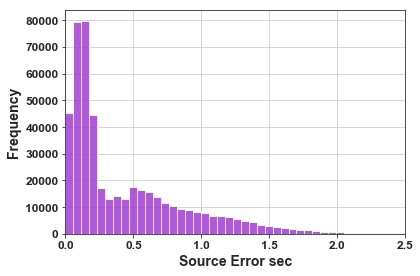

In [230]:
df['source_error_sec'].plot(kind='hist', bins = 500, logy= False, facecolor='darkorchid', alpha=0.80)
plt.xlim([0, 2.5])

plt.ylabel("Frequency",fontweight='bold',fontsize=14)
plt.xlabel('Source Error sec',fontweight='bold',fontsize=14)
plt.rcParams.update({'font.size': 12})
plt.tick_params()
plt.grid(True)
plt.tight_layout()
plt.savefig('15b.png', dpi=300)
plt.show()

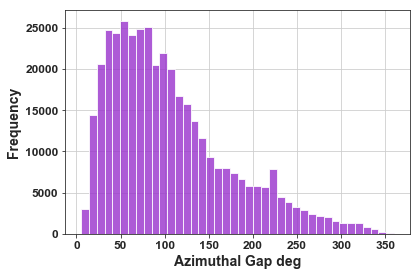

In [177]:
df['source_gap_deg'].plot(kind='hist', bins = 40, logy=False, facecolor='darkorchid', alpha=0.80)
plt.ylabel("Frequency",fontweight='bold',fontsize=14)
plt.xlabel('Azimuthal Gap deg',fontweight='bold',fontsize=14)
plt.rcParams.update({'font.size': 12})
plt.tick_params()
plt.grid(True)
plt.tight_layout()
plt.savefig('15c.png', dpi=300)
plt.show()

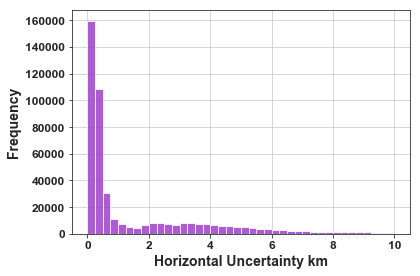

In [241]:
df['source_horizontal_uncertainty_km'].plot(kind='hist', bins = 40, logx=False, logy=False, facecolor='darkorchid', alpha=0.80)
plt.ylabel("Frequency",fontweight='bold',fontsize=14)
plt.xlabel('Horizontal Uncertainty km',fontweight='bold',fontsize=14)
plt.rcParams.update({'font.size': 12})
plt.tick_params()
plt.grid(True)
plt.tight_layout()
plt.savefig('15d.png', dpi=300)
plt.show()

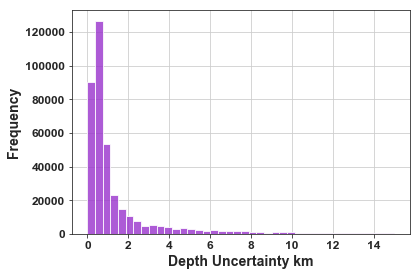

In [242]:
df['source_depth_uncertainty_km'].plot(kind='hist', bins = 40, logy=False, facecolor='darkorchid', alpha=0.80)

plt.ylabel("Frequency",fontweight='bold',fontsize=14)
plt.xlabel('Depth Uncertainty km',fontweight='bold',fontsize=14)
plt.rcParams.update({'font.size': 12})
plt.tick_params()
plt.grid(True)
plt.tight_layout()
plt.savefig('15e.png', dpi=300)
plt.show()